# Assignment 1
BMI 2005 - BioAlgorithms  
Due: 01/30/19 

By: **Ryan Neff**  
ryan.neff@icahn.mssm.edu   

# Question 1

Lennard Jones potential (LJ) function: 

`V_lj = 4*epsilon*((sigma/distance)^12 - (sigma/distance)^6)`

Where:  
* episilon, e: depth of potential well (strength of non-bonded attraction between two atoms)  
* sigma, s: distance at which inter-particle potential is 0  
* distance, r: distance between particles 

### Question 1a #####

In [2]:
def naive_lennard_jones(r,s=1,e=1):
    '''naive_lennard_jones(r)
     Computes the potential energy V_ij between two atoms i and j
     with distance r where e and s are set to 1

     Inputs: 
        r (float)
            Distance between two atoms i and j
    
    Outputs:
        V_ij (float)
            Potential energy between two atoms
    '''
    return 4*s*e*(s**12/r**12 - s**6/r**6)

### Question 1b #####
`efficient algorithm equation:
    V_ij = -4*e*u(1-u)
substitute z**3 for u:
    V_ij = -4*e*z^3(1-z^3)
substitute s^2/r^2 for z:
    V_ij = -4*e*(s^2/r^2)^3(1-(s^2/r^2)^3)
distribute powers:
    V_ij = -4*e*(s^6/r^6)(1-(s^6/r^6))
move s^6/r^6 to inside parenthesis:
    V_ij = -4*e*((s^6/r^6)*1 - (s^6/r^6)*(s^6/r^6))
distribute powers: 
    V_ij = -4*e*((s^6/r^6) - (s^12/r^12))
move -1 to inside parenthesis:
    V_ij = 4*e*(-(s^6/r^6) + (s^12/r^12))
    V_ij = 4*e*((s^12/r^12)-(s^6/r^6))
Let x^z/y^z = (x/y)^z.
    therefore:
        V_ij = 4*e*((s/r)^12-(s/r)^6)
***This is the original equation. QED***
`

### Question 1c #####

In [4]:
def efficient_lennard_jones(r,s,e):
    '''efficient_lennard_jones(r,s,e)
     Computes the potential energy V_ij between two atoms i and j

     Inputs: 
        r (float)
            Distance between two atoms i and j
        s (float)
            Sigma, distance at which inter-particle potential is 0
        e (float)
            Epsilon, strength of non-bonded attraction between two atoms
    
    Outputs:
        V_ij (float)
            Potential energy between two atoms
    '''

    r2 = r**2
    s2 = s**2
    z = s2/r2
    u = z**3
    return -4*e*u*(1-u)

## Performance Analysis ##
```
naive:  
    code:  
        return 4*s*e*(s**12/r**12 - s**6/r**6)    

    First step: r**12
    Second step: s**12  
    Third step: s**12/r**12  
    Fourth step: r**6  
    Fifth step: s**6  
    Sixth step: s**6/r**6  
    Seventh step: s**12/r**12-s**6/r**6  
    Eighth step: 4*s  
    Ninth step: 4*s*e  
    Tenth step: 4*s*e*(s**12/r**12-s**6/r**6)  

    Total steps: 10
    Performance: O(1) - constant time for constant input

efficient:
    code: 
        r2 = r**2
        s2 = s**2
        z = s2/r2
        u = z**3
        return -4*e*u*(1-u)

    First step: r2 = r**2
    Second step: s2 = s**2
    Third step: z = s2/r2
    Fourth step: u = z**3
    Fifth step: 1-u
    Sixth step: -4*e
    Seventh step: (-4*e)*u
    Eighth step: ((-4*e)*u)*(1-u)

    Total steps: 8
    Performance: O(1) - constant time for constant input
```
## Conclusion ##
The efficient algorithm should be around 20% faster than the naive implementation, 
but both of them run in constant time.

### Question 1d #####

In [7]:
import cProfile
print("Naive implementation")
cProfile.run('for i in range(0,1000000): naive_lennard_jones(2.5)') #naive
print("Efficient implementation")
cProfile.run('for i in range(0,1000000): efficient_lennard_jones(2.5,1,1)') #efficient

Naive implementation
         1000003 function calls in 1.042 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000000    0.826    0.000    0.826    0.000 <ipython-input-2-712c776f7e49>:1(naive_lennard_jones)
        1    0.216    0.216    1.042    1.042 <string>:1(<module>)
        1    0.000    0.000    1.042    1.042 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


Efficient implementation
         1000003 function calls in 0.786 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000000    0.576    0.000    0.576    0.000 <ipython-input-4-d30ff7ddce2a>:1(efficient_lennard_jones)
        1    0.211    0.211    0.786    0.786 <string>:1(<module>)
        1    0.000    0.000    0.786    0.786 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disa

## Conclusion ##
The efficient implementation is more efficient timewise. The efficient 
implementation has fewer operations because it only calculates the common factors for the 
fractions inside the parentheses (saving some work). This is reflected in the cProfile 
timings for 1M loop iterations.

# Question 2

### Question 2a #####

In [8]:
import numpy as np
import re

def read_xyz(input_filename):
    '''read_xyz(input_filename)
    Reads an XYZ file to a numpy float32 array.

    Inputs:
        input_filename
            Filename of XYZ file on disk. 

            File format: 
                line 1: <number of atoms / lines>
                line2: <comment>
                line 3+: <atom type> <x> <y> <z>
    
    Returns: 
        output
            Array of 3D positions of atoms in file. 
    '''

    number_of_atoms, comment, output = None, None, []
    with open(input_filename,"r") as fp:
        for line in fp:
            line = line.strip() #clean input
            if number_of_atoms == None:
                number_of_atoms = int(line)
            elif comment == None:
                comment = line
            else:
                splitline = [float(a) for a in re.split(" +",line)[1:]]
                output.append(splitline)
    output = np.array(output,dtype="float32")
    return output

##### Question 2b #####

In [9]:
with open("lj-0003.xyz","w") as fp:
    fp.write('''3
Cambridge Cluster Database
LJ 0.5391356726 0.1106588251 -0.4635601962
LJ -0.5185079933 0.4850176090 0.0537084789
LJ 0.0793723207 -0.4956764341 0.5098517173''')

test_3 = read_xyz("lj-0003.xyz")
test_200 = read_xyz("lj-0200.xyz")
test_500 = read_xyz("lj-0500.xyz")
test_1000 = read_xyz("lj-1000.xyz")

# Question 3

### Question 3a #####

In [10]:
def number_of_pairwise_interactions(n):
    return int((n**2-n)/2)

print("For 3 atoms:", number_of_pairwise_interactions(3))
print("For 200 atoms:", number_of_pairwise_interactions(200))
print("For 500 atoms:", number_of_pairwise_interactions(500))
print("For 1000 atoms:", number_of_pairwise_interactions(1000))

For 3 atoms: 3
For 200 atoms: 19900
For 500 atoms: 124750
For 1000 atoms: 499500


### Question 3b #####

In [12]:
def calculate_pairwise_distance(i,j):
    '''calculate_pairwise_distance(i,j)
    Calculates distance between two sets of 3D coordinates. 

    Inputs:
        i - list-like with 3 elements, all floats
            x,y,z position for set 1
        j - list-like with 3 elements, all floats
            x,y,z position for set 2
    
    Returns:
        distance
            Distance between i and j. 
    '''
    return np.sqrt( (j[0]-i[0])**2 + (j[1]-i[1])**2 + (j[2]-i[2])**2 )

def calculate_system_energy(input_array):
    '''calculate_system_energy(input_array)
    Calculates the total potential energy of the system based on atom 3D coordinates,
    using the LJ equation (efficient algorithm). 

    Inputs:
        input_array
            A numpy.array() of dtype float32, (n rows by 3 columns), 
            representing 3D coordiantes of atoms. 

    Returns:
        total_energy (float)
            The total energy of the system.
    '''
    total_energy = 0
    num_rows = len(input_array)
    for row1_ix in range(0,num_rows):
        row1 = input_array[row1_ix,:]
        for row2_ix in range(row1_ix+1,num_rows):
            total_energy += efficient_lennard_jones(calculate_pairwise_distance(row1,input_array[row2_ix,:]),1,1)
    return total_energy

## Output potential energy calculations
print(calculate_system_energy(test_3)) ## -2.42451546927
print(calculate_system_energy(test_200)) ## -799.624784069
print(calculate_system_energy(test_500)) ## -3315.98663275
print(calculate_system_energy(test_1000)) ## -7017.92348826

-2.42451546927
-799.624784069
-3315.98663275
-7017.92348826


# Question 4

### Question 4a #####

In [13]:
def calculate_system_energy_naive_cutoff(input_array, cutoff_dist=1):
    '''calculate_system_energy_naive_cutoff(input_array)
    Calculates the total potential energy of the system based on atom 3D coordinates,
    using the LJ equation (efficient algorithm). 

    Inputs:
        input_array
            A numpy.array() of dtype float32, (n rows by 3 columns), 
            representing 3D coordiantes of atoms.
        cutoff_dist
            Distance within we will consider pairwise interactions. Beyond this, 
            the energy will not be calculated. 

    Returns:
        total_energy (float)
            The total energy of the system.
    '''
    total_energy = 0
    num_rows = len(input_array)
    for row1_ix in range(0,num_rows):
        row1 = input_array[row1_ix,:]
        for row2_ix in range(row1_ix+1,num_rows):
            r = calculate_pairwise_distance(row1,input_array[row2_ix,:])
            if r <= cutoff_dist:
                total_energy += efficient_lennard_jones(r,1,1)
    return total_energy

print(calculate_system_energy_naive_cutoff(test_3)) ## 0
print(calculate_system_energy_naive_cutoff(test_200)) ## 37.8305661135
print(calculate_system_energy_naive_cutoff(test_500)) ## 30.5643572661
print(calculate_system_energy_naive_cutoff(test_1000)) ## 58.5072399514

0
37.8305661135
30.5643572661
58.5072399514


### Conclusion

No, this is a terrible cutoff. Any values with distances below 1 have a positive energy, and above 1 have a negative energy. The values are way off from the real values. 


### Question 4b #####

In [14]:
cutoff_results = []

for cutoff in range(5,50):
    cutoff = cutoff/10
    res = (cutoff,calculate_system_energy_naive_cutoff(test_1000,cutoff))
    print(res)
    cutoff_results.append(res)

cutoff_results = np.array(cutoff_results)
print(cutoff_results)

(0.5, 0)
(0.6, 0)
(0.7, 0)
(0.8, 0)
(0.9, 0)
(1.0, 58.50723995135499)
(1.1, -2306.512680215119)
(1.2, -4995.1024525203129)
(1.3, -5000.1721882622924)
(1.4, -5001.1699938772845)
(1.5, -5025.0920934338328)
(1.6, -5627.1969826076784)
(1.7, -5631.825118612529)
(1.8, -5682.7524489700882)
(1.9, -6033.937774074423)
(2.0, -6358.973914454401)
(2.1, -6408.4642615616322)
(2.2, -6551.1959376911591)
(2.3, -6601.067007052111)
(2.4, -6608.3495103767373)
(2.5, -6704.1623075799225)
(2.6, -6721.7050311238127)
(2.7, -6751.010877919568)
(2.8, -6783.1506269241863)
(2.9, -6828.2563850977431)
(3.0, -6867.9354360142379)
(3.1, -6875.4644610084233)
(3.2, -6889.7332767907765)
(3.3, -6903.3188015144442)
(3.4, -6914.3017886532571)
(3.5, -6925.0270770113257)
(3.6, -6935.3613955591682)
(3.7, -6945.8938799311036)
(3.8, -6953.3731458138163)
(3.9, -6961.7257349350384)
(4.0, -6968.6521231016659)
(4.1, -6972.3751785731065)
(4.2, -6975.8133441936661)
(4.3, -6980.6769075559932)
(4.4, -6983.6046586565599)
(4.5, -6986.854141

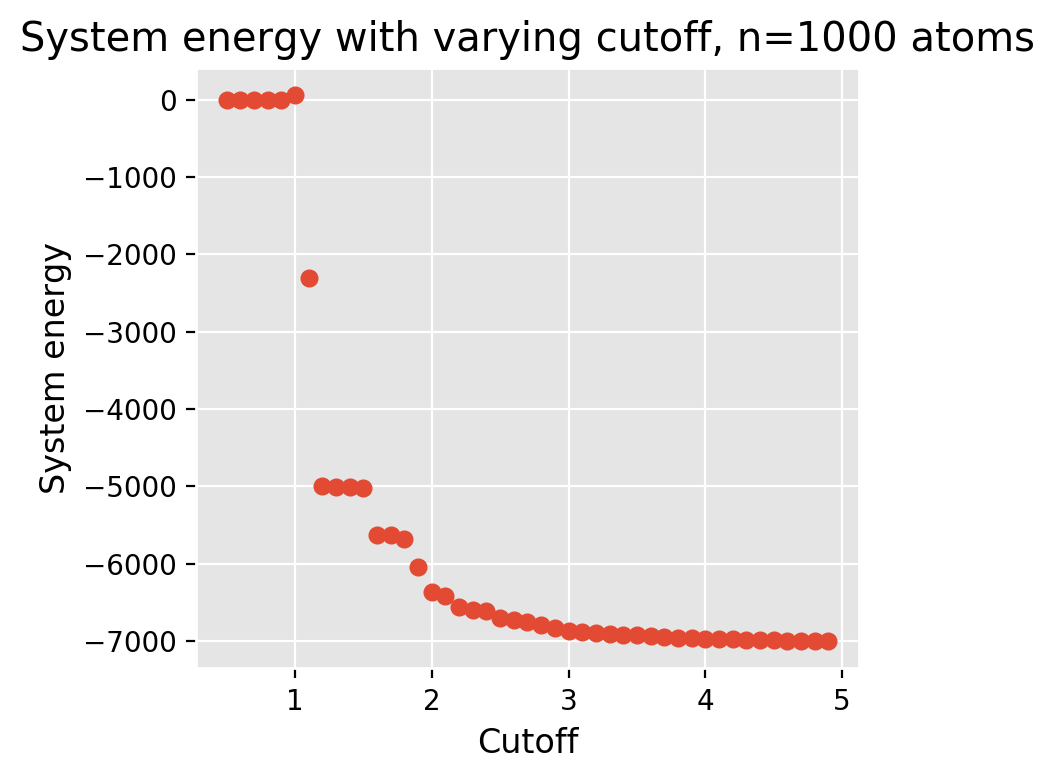

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

plt.style.use('ggplot')
rcParams['figure.figsize'] = (5,4)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'DejaVu Sans'

COLOR = 'black'
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

plt.scatter(cutoff_results[:,0],cutoff_results[:,1])
plt.title("System energy with varying cutoff, n=1000 atoms")
plt.xlabel("Cutoff")
plt.ylabel("System energy")
plt.tight_layout()
plt.savefig("problem_4b.png")
plt.show()

### Conclusion

By the chart and the results, the point on the graph where it is at 99% of the real system energy is at -7017*0.99 = -6,947 or around a cutoff of 3.7. 


### Question 4c #####

In [15]:
ideal_cutoff = 3.7

cProfile.run('calculate_system_energy(test_3)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_3,ideal_cutoff)') #naive cutoff

cProfile.run('calculate_system_energy(test_200)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_200,ideal_cutoff)') #naive cutoff

cProfile.run('calculate_system_energy(test_500)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_500,ideal_cutoff)') #naive cutoff

cProfile.run('calculate_system_energy(test_1000)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_1000,ideal_cutoff)') #naive cutoff

         11 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <ipython-input-12-f02a3be60cca>:1(calculate_pairwise_distance)
        1    0.000    0.000    0.000    0.000 <ipython-input-12-f02a3be60cca>:17(calculate_system_energy)
        3    0.000    0.000    0.000    0.000 <ipython-input-4-d30ff7ddce2a>:1(efficient_lennard_jones)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         11 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <ipython-input-12-f02a

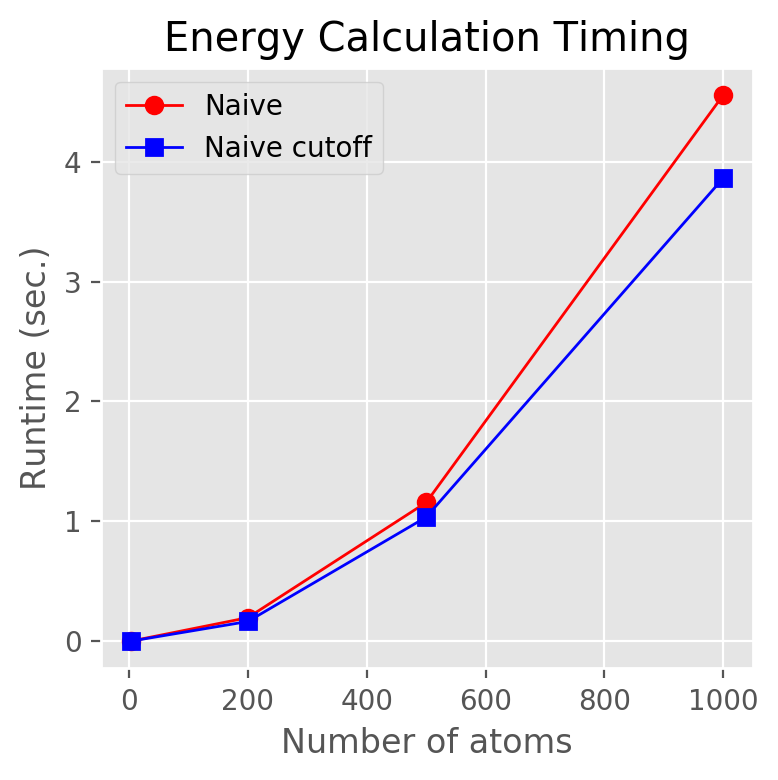

In [21]:
import time

def runtime(function):
    t0 = time.time()  # start time
    exec(function)
    t1 = time.time() # end time
    return(t1-t0)

n3 = runtime('calculate_system_energy(test_3)') #naive
c3 = runtime('calculate_system_energy_naive_cutoff(test_3,ideal_cutoff)') #naive cutoff

n200 = runtime('calculate_system_energy(test_200)') #naive
c200 = runtime('calculate_system_energy_naive_cutoff(test_200,ideal_cutoff)') #naive cutoff

n500 = runtime('calculate_system_energy(test_500)') #naive
c500 = runtime('calculate_system_energy_naive_cutoff(test_500,ideal_cutoff)') #naive cutoff

n1000 = runtime('calculate_system_energy(test_1000)') #naive
c1000 = runtime('calculate_system_energy_naive_cutoff(test_1000,ideal_cutoff)') #naive cutoff

plt.style.use('ggplot')
rcParams['figure.figsize'] = (4,4)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'DejaVu Sans'

plt.plot([3,200,500,1000],[n3,n200,n500,n1000],"ro-",linewidth="1")
plt.plot([3,200,500,1000],[c3,c200,c500,c1000],"bs-",linewidth="1")
plt.title("Energy Calculation Timing")
plt.xlabel("Number of atoms")
plt.ylabel("Runtime (sec.)")
plt.legend(["Naive","Naive cutoff"])
plt.tight_layout()
plt.savefig("problem_4c.png")
plt.show()

### Conclusion

No, we have not solved the N2 scaling problem, since we are still calculating all pairwise
distance between atom pairs (and therefore need to do N2 array accesses). We have only slightly reduced the runtime 
of the energy calculation. Idea: Perhaps we could reduce the complexity by calculating distances to a 
known point (e.g. the origin), sorting the values, and then only calculating the nearest pairs within a 
sliding window. 

# Question 5

#### Give the tilde approximations for the following quantities.

#### a) N + 1
Answer: N
#### b) 1 + 1/N
Answer: 1
#### c) (1 + 1/N)(1 + 2/N)
Answer: 1
#### d) 2N^3 - 15N^2 + N
Answer: 2N^3
#### e) log(2N)/log(N)
Answer: 1 (since top goes to log(2)+log(N))
#### f) log(N^2+1)/log(N)
Answer: 2 (since for large N top goes to 2*log(N))
#### g) N^100/(2^N)
Answer: 1 (FOR N>>100, 2^N rises faster than N^100, function goes to 0)
